In [2]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_excel('Employee.xlsx', sheet_name=None)

In [4]:
sheets = [sh for sh in data]
exist_empl = data[sheets[1]]
exist_empl.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,2001,0.58,0.74,4,215,3,0,0,sales,low
1,2002,0.82,0.67,2,202,3,0,0,sales,low
2,2003,0.45,0.69,5,193,3,0,0,sales,low
3,2004,0.78,0.82,5,247,3,0,0,sales,low
4,2005,0.49,0.60,3,214,2,0,0,sales,low


In [5]:
left_empl = data[sheets[2]]
left_empl.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,2,0.80,0.86,5,262,6,0,0,sales,medium
2,3,0.11,0.88,7,272,4,0,0,sales,medium
3,4,0.72,0.87,5,223,5,0,0,sales,low
4,5,0.37,0.52,2,159,3,0,0,sales,low


In [19]:
exist_empl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11428 entries, 0 to 11427
Data columns (total 10 columns):
Emp ID                   11428 non-null int64
satisfaction_level       11428 non-null float64
last_evaluation          11428 non-null float64
number_project           11428 non-null int64
average_montly_hours     11428 non-null int64
time_spend_company       11428 non-null int64
Work_accident            11428 non-null int64
promotion_last_5years    11428 non-null int64
dept                     11428 non-null object
salary                   11428 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 892.9+ KB


In [20]:
exist_empl.describe()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
count,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000
mean,7812.340742,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
std,3453.947461,0.217104,0.162005,0.979884,45.682731,1.562348,0.379991,0.159889
min,2001.000000,0.120000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,4857.750000,0.540000,0.580000,3.000000,162.000000,2.000000,0.000000,0.000000
50%,7714.500000,0.690000,0.710000,4.000000,198.000000,3.000000,0.000000,0.000000
75%,10571.250000,0.840000,0.850000,4.000000,238.000000,4.000000,0.000000,0.000000
max,14211.000000,1.000000,1.000000,6.000000,287.000000,10.000000,1.000000,1.000000


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
sns.set_style('whitegrid')

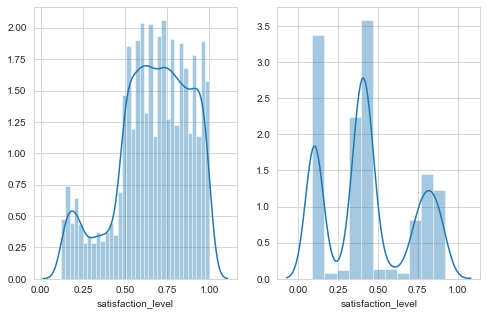

In [8]:
fig, axes = plt.subplots(1,2, figsize=(8,5))
sns.distplot(exist_empl['satisfaction_level'], ax=axes[0])
sns.distplot(left_empl['satisfaction_level'], ax=axes[1])

We can see that majority of those leaving their Job have a low satisfactory level

In [9]:
def satisLevel(s):
    xx = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
    xy = [2,3,4,5,6,7,8,9,10]
    for x,y in zip(xx,xy):
        if s <= x:
            return y
    return 10

In [10]:
exist_empl['satis'] = exist_empl['satisfaction_level'].apply(satisLevel)
exist_empl.head(2)

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,satis
0,2001,0.58,0.74,4,215,3,0,0,sales,low,6
1,2002,0.82,0.67,2,202,3,0,0,sales,low,9


In [11]:
left_empl['satis'] = left_empl['satisfaction_level'].apply(satisLevel)

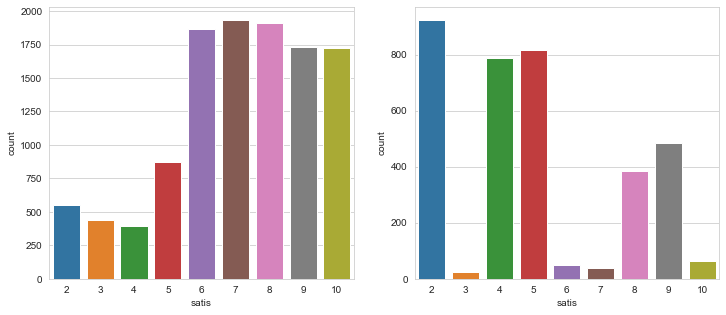

In [12]:
fig, axes = plt.subplots(1,2, figsize=(12,5))
sns.countplot(exist_empl['satis'], ax=axes[0])
sns.countplot(left_empl['satis'], ax=axes[1])

From the chart above, we can see that employees are likely to stay if the satisfactory level is above 0.5

In [31]:
exist_empl['dept'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'RandD', 'marketing'], dtype=object)

Let us work on the daprtment

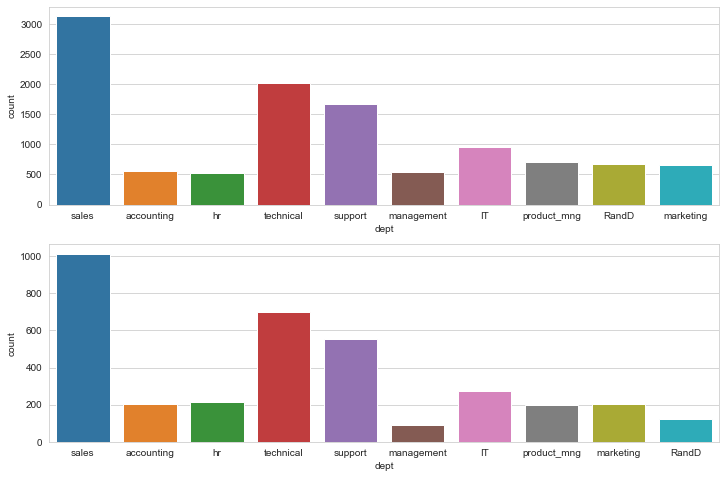

In [13]:
fig, axes = plt.subplots(2,1, figsize=(12,8))
sns.countplot(exist_empl['dept'], ax=axes[0])
sns.countplot(left_empl['dept'], ax=axes[1])

The sales department has majority of Employee. 
It is obvious the department has nothing to do with employee staying or leaving. Charts are almost identical

Let's Evaluate the Salary

In [35]:
exist_empl['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

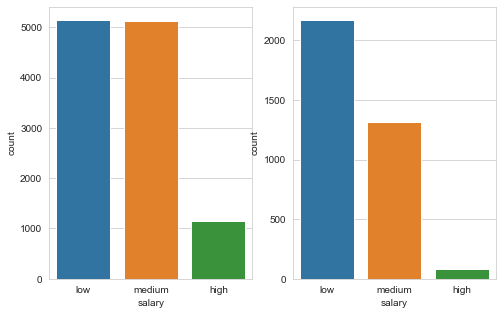

In [14]:
fig, axes = plt.subplots(1,2, figsize=(8,5))
sns.countplot(exist_empl['salary'], ax=axes[0])
sns.countplot(left_empl['salary'], ax=axes[1])

We can't conclude that Employees with low salary left their job because we have lots of Employee with low and medium salary still working

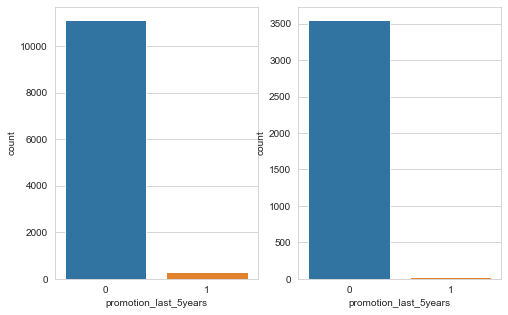

In [15]:
fig, axes = plt.subplots(1,2, figsize=(8,5))
sns.countplot(exist_empl['promotion_last_5years'], ax=axes[0])
sns.countplot(left_empl['promotion_last_5years'], ax=axes[1])

We Can see that the company hardly promotes Employee

In [16]:
def evalLevel(s):
    xx = [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
    xy = [3,4,5,6,7,8,9,10]
    for x,y in zip(xx,xy):
        if s <= x:
            return y
    return 10

In [17]:
exist_empl['eval'] = exist_empl['last_evaluation'].apply(evalLevel)
left_empl['eval'] = left_empl['last_evaluation'].apply(evalLevel)
exist_empl.head(2)

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,satis,eval
0,2001,0.58,0.74,4,215,3,0,0,sales,low,6,8
1,2002,0.82,0.67,2,202,3,0,0,sales,low,9,7


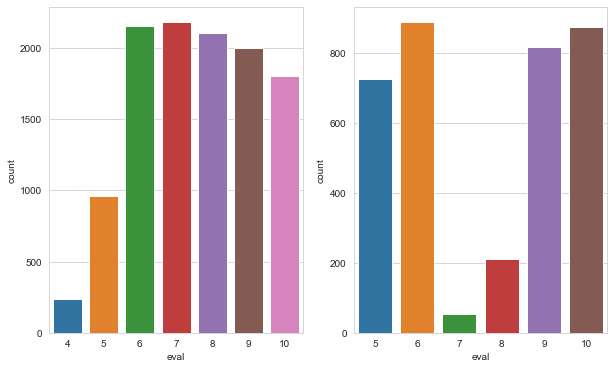

In [18]:
fig, axes = plt.subplots(1,2, figsize=(10,6))
sns.countplot(exist_empl['eval'], ax=axes[0])
sns.countplot(left_empl['eval'], ax=axes[1])

In [48]:
left_empl.describe()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,satis,eval
count,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000
mean,6500.439653,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321,4.980678,7.595071
std,6266.484705,0.263933,0.197673,1.818165,61.202825,0.977698,0.212364,0.072759,2.493895,1.971255
min,1.000000,0.090000,0.450000,2.000000,126.000000,2.000000,0.000000,0.000000,2.000000,5.000000
25%,893.500000,0.130000,0.520000,2.000000,146.000000,3.000000,0.000000,0.000000,2.000000,6.000000
50%,1786.000000,0.410000,0.790000,4.000000,224.000000,4.000000,0.000000,0.000000,5.000000,8.000000
75%,12678.500000,0.730000,0.900000,6.000000,262.000000,5.000000,0.000000,0.000000,8.000000,9.000000
max,14999.000000,0.920000,1.000000,7.000000,310.000000,6.000000,1.000000,1.000000,10.000000,10.000000


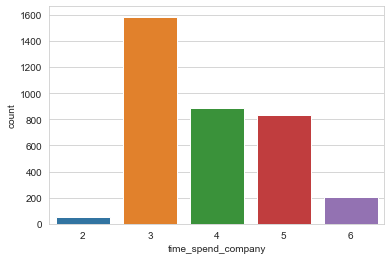

In [19]:
sns.countplot(left_empl['time_spend_company'])

Majority left in the third year

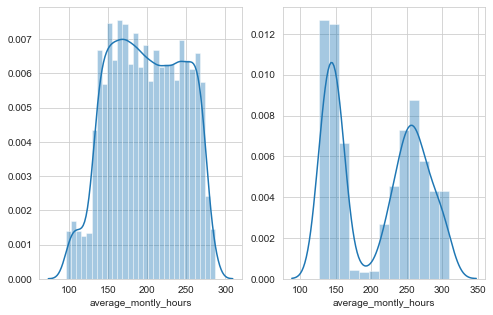

In [20]:
fig, axes = plt.subplots(1,2, figsize=(8,5))
sns.distplot(exist_empl['average_montly_hours'], ax=axes[0])
sns.distplot(left_empl['average_montly_hours'], ax=axes[1])

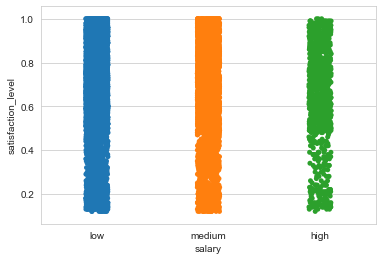

In [21]:
sns.stripplot(x='salary',y='satisfaction_level', data=exist_empl)

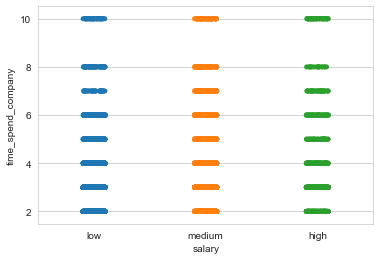

In [22]:
sns.stripplot(x='salary',y='time_spend_company', data=exist_empl)

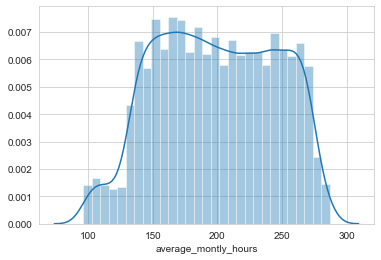

In [24]:
sns.distplot(exist_empl['average_montly_hours'])

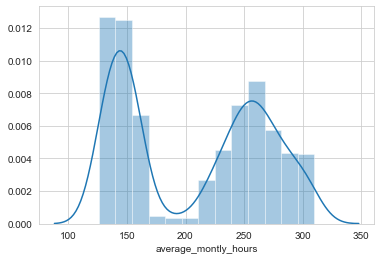

In [25]:
sns.distplot(left_empl['average_montly_hours'])